In [12]:
import pandas as pd



irreligion_article_url = "https://en.wikipedia.org/w/index.php?title=List_of_countries_by_irreligion&oldid=946799645"
tables_in_irreligion_article = pd.read_html(irreligion_article_url)
tables_in_irreligion_article[0].to_csv('irreligion_wikipedia_table.txt',  sep = ";")

irreligion_by_country = tables_in_irreligion_article[0][["Country or region", "WIN/GIA (2017)[7]"	]]
irreligion_by_country.columns = ["country", "irreligion_proportion"]

import re

irreligion_by_country["country"] = [re.sub(r" \(details\)", "", country).strip() for country in irreligion_by_country["country"]]
irreligion_by_country

/home/lubianat/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,country,irreligion_proportion
0,Afghanistan,NaN
1,Albania,39%
2,Argentina,34%
3,Armenia,6%
4,Australia,63%
...,...,...
94,United States,39%
95,Uruguay,NaN
96,Uzbekistan,NaN
97,Venezuela,NaN


In [14]:
from bs4 import BeautifulSoup

url = "https://interactives.lowyinstitute.org/features/covid-performance/"  # change to whatever your url is

covid_19_ranking = pd.read_html(url)[1]
covid_19_ranking.columns = ["idx", "country", "points"]

In [20]:
merged_table = covid_19_ranking.merge(irreligion_by_country).dropna()

In [21]:
merged_table

,idx,country,points,irreligion_proportion
1,2,Vietnam,90.8,63%
3,4,Thailand,84.2,2%
4,7,Iceland,80.1,49%
5,8,Australia,77.9,63%
6,9,Latvia,77.5,52%
7,11,Estonia,76.4,60%
12,17,Finland,70.4,55%
13,18,Norway,70.0,62%
14,19,Lithuania,69.7,40%
15,20,South Korea,69.4,60%


In [25]:
def get_proportion(percentage_string):
    number_to_be_divided = float(percentage_string.strip("%"))
    proportion = number_to_be_divided/100
    return(proportion)


merged_table["irreligion_proportion"] = merged_table["irreligion_proportion"].map(get_proportion)

In [26]:
from scipy.stats import spearmanr
spearmanr(merged_table["irreligion_proportion"], merged_table["points"])

SpearmanrResult(correlation=0.4337591544175638, pvalue=0.002599261506745306)

[Text(0, 0.5, 'Pontos no ranking de combate a COVID-19'),
 Text(0.5, 0, 'Proporção de pessoas não religiosas')]

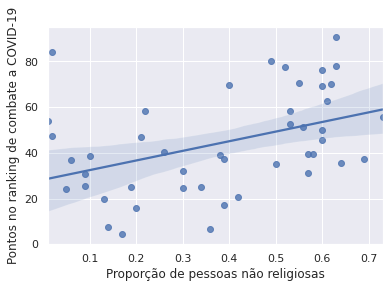

In [27]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt


ax = sns.regplot(x="irreligion_proportion", y="points", data=merged_table)
ax.set(xlabel='Proporção de pessoas não religiosas', ylabel='Pontos no ranking de combate a COVID-19')

